<a href="https://colab.research.google.com/github/jmohsbeck1/jpmc_mle/blob/main/JPMC_Day3_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# BUT - before that... let's create a quick template for building models... Algorithm Harness

In [ ]:
#Import your Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
%matplotlib inline

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/fenago/classify/main/data/online_shoppers_intention.csv')
df.head()

Notes
This session covers data collection and some procedures of data preparation.

Commands, functions, and methods:

!wget - Linux shell command for downloading data
pd.read.csv() - read csv files
df.head() - take a look of the dataframe
df.head().T - take a look of the transposed dataframe
df.columns - retrieve column names of a dataframe
df.columns.str.lower() - lowercase all the letters
df.columns.str.replace(' ', '_') - replace the space separator
df.dtypes - retrieve data types of all series
df.index - retrive indices of a dataframe
pd.to_numeric() - convert a series values to numerical values. The errors=coerce argument allows making the transformation despite some encountered errors.
df.fillna() - replace NAs with some value
(df.x == "yes").astype(int) - convert x series of yes-no values to numerical values.
df['Weight'] = df['Weight'].astype(int) - this takes a single column of data and converts the data type

In [ ]:
len(df)

12330

In [ ]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [ ]:
df.shape

(12330, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
df.nunique()

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

In [ ]:
df.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,-0.006347,-0.025035,-0.005487,-0.033561,0.026417,0.138917
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,-0.007343,-0.015392,-0.005561,-0.014376,0.014990,0.093587
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,-0.009527,-0.038235,-0.029169,-0.034491,0.035785,0.095200
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,-0.009579,-0.019285,-0.027144,-0.024675,0.024078,0.070345
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.004290,-0.013146,-0.038122,-0.043064,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.002976,-0.007380,-0.033091,-0.036377,0.007311,0.152373
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,0.023823,-0.015772,-0.006485,0.078286,-0.046514,-0.150673
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,0.014567,-0.004442,-0.008907,0.078616,-0.062587,-0.207071
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.018508,0.045592,0.011315,0.012532,0.012002,0.492569
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.012652,0.003499,-0.016098,0.052301,-0.016767,-0.082305


In [ ]:
# Basic Data Cleaning
df.columns = df.columns.str.lower().str.replace(' ', '_') # A
 
string_columns = list(df.dtypes[df.dtypes == 'object'].index) # B
 
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_') # C

In [ ]:
df.head()

,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,month,operatingsystems,browser,region,traffictype,visitortype,weekend,revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,feb,1,1,1,1,returning_visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,feb,2,2,1,2,returning_visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,feb,4,1,9,3,returning_visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,feb,3,2,2,4,returning_visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,feb,3,3,1,4,returning_visitor,True,False


In [ ]:
# 999999999 - several values of that in the income, assets, and debt column
# if you ever need to replace values in a col -> here is your template for that
# for c in ['income', 'assets','debt']:
#  df[c] = df[c].replace(to_replace=99999999,value=np.nan)
# df = df[df.status != 'unk']
df.nunique()

administrative               27
administrative_duration    3335
informational                17
informational_duration     1258
productrelated              311
productrelated_duration    9551
bouncerates                1872
exitrates                  4777
pagevalues                 2704
specialday                    6
month                        10
operatingsystems              8
browser                      13
region                        9
traffictype                  20
visitortype                   3
weekend                       2
revenue                       2
dtype: int64

In [ ]:
df['revenue'].unique()

array([False,  True])

In [ ]:
df['revenue'].value_counts()

False    10422
True      1908
Name: revenue, dtype: int64

In [ ]:
# df = df[df.status != 0]
df.revenue.value_counts() 

False    10422
True      1908
Name: revenue, dtype: int64

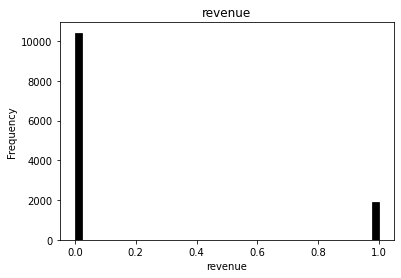

In [ ]:
# Replace with your target variable --- df.YOUR_TARGET_VARIABLE  
# Look for major data imbalances
# Also replace your X label
# REPLACE YOUR TARGET VARIABLE
plt.figure(figsize=(6, 4))

sns.histplot(df.revenue, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('revenue')
plt.title('revenue')

plt.show()

Notes
(1) Check for NaN under a single DataFrame column:

df['your column name'].isnull().values.any()

(2) Count the NaN under a single DataFrame column:

df['your column name'].isnull().sum()

(3) Check for NaN under an entire DataFrame:
df.isnull().values.any()

(4) Count the NaN under an entire DataFrame:
df.isnull().sum().sum()

In [ ]:
# Check for nulls --- you do NOT want nulls when you train
df.isnull().sum()

administrative             0
administrative_duration    0
informational              0
informational_duration     0
productrelated             0
productrelated_duration    0
bouncerates                0
exitrates                  0
pagevalues                 0
specialday                 0
month                      0
operatingsystems           0
browser                    0
region                     0
traffictype                0
visitortype                0
weekend                    0
revenue                    0
dtype: int64

In [ ]:
#delete columns --- this may or may NOT be needed.  As before - skip if you don't need it
# You will encounter times where you will want to delete columns.  This is how you do that.
# df = df.drop(['x5_latitude', 'x6_longitude', 'x1_transaction_date'], axis=1)
# df

In [ ]:
# Split the data into test, train, validation sets... 80/20
from sklearn.model_selection import train_test_split
# This gives the 80/20 train test split
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=11)

len(df_train_full), len(df_test)
# Replace nulls with 0's - these are pandas dataframes
df_train_full = df_train_full.fillna(0)

df_test = df_test.fillna(0)
len(df_train_full),len(df_test)

(9864, 2466)

In [ ]:
#Split the y out into train/test/splits... these are numpy ndarrays ... msrp is your target variables
# Replace with your target variable!!!  
y_train = (df_train_full.revenue).values
y_test = (df_test.revenue).values
del df_train_full['revenue']
del df_test['revenue']

In [ ]:
len(y_train),len(y_test)


(9864, 2466)

In [ ]:
# Convert these data frames into a LIST of DICTIONARIES (each element in the list is a dictionary (the record))
# IF YOU HAVE CAT values... we need to encode them... pandas get dummies OR dictionary vectorizor OR several other examples... allow us to encode
# this example will work with ANY cat data.
dict_train = df_train_full.to_dict(orient='records')
dict_test = df_test.to_dict(orient='records')

In [ ]:
# Convert the LIST OF DICTIONARIES into a Feature Matrix (does all of the encoding)
from sklearn.feature_extraction import DictVectorizer
 
dv = DictVectorizer(sparse=False)
 
X_train = dv.fit_transform(dict_train)
X_test = dv.transform(dict_test)
features = dv.feature_names_  #Features as they exist in the Vectorized Dictionary (this is an ndarray)

In [ ]:
features

['administrative',
 'administrative_duration',
 'bouncerates',
 'browser',
 'exitrates',
 'informational',
 'informational_duration',
 'month=aug',
 'month=dec',
 'month=feb',
 'month=jul',
 'month=june',
 'month=mar',
 'month=may',
 'month=nov',
 'month=oct',
 'month=sep',
 'operatingsystems',
 'pagevalues',
 'productrelated',
 'productrelated_duration',
 'region',
 'specialday',
 'traffictype',
 'visitortype=new_visitor',
 'visitortype=other',
 'visitortype=returning_visitor',
 'weekend']

In [ ]:
X_test.shape

(2466, 28)

LR: 0.894390 (0.018003)
Score for each of the 10 K-fold tests:  [0.91865685 0.86211811 0.88744728 0.89877164 0.89589066 0.87081529
 0.88058798 0.90304296 0.91155315 0.91501595]
LogisticRegression(solver='liblinear')
	Training time: 0.265s
	Prediction time: 2.209s

LDA: 0.895432 (0.017615)
Score for each of the 10 K-fold tests:  [0.91857972 0.8616021  0.88799097 0.90206828 0.89907051 0.87484812
 0.88246273 0.90097884 0.90863234 0.91808612]
LinearDiscriminantAnalysis()
	Training time: 0.142s
	Prediction time: 1.756s

KNN: 0.762532 (0.025535)
Score for each of the 10 K-fold tests:  [0.76616449 0.75604063 0.72433521 0.77332373 0.7724309  0.74335254
 0.72835942 0.81647907 0.76374586 0.78108852]
KNeighborsClassifier()
	Training time: 0.002s
	Prediction time: 2.338s

CART: 0.737740 (0.020318)
Score for each of the 10 K-fold tests:  [0.74773211 0.72894995 0.7195779  0.76624312 0.73063047 0.73239085
 0.69974035 0.75950622 0.72807923 0.76454545]
DecisionTreeClassifier()
	Training time: 0.213s
	P

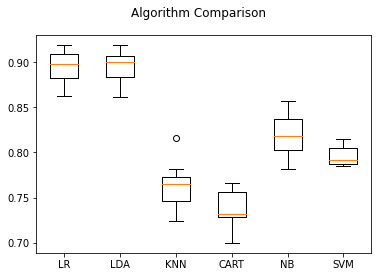

In [ ]:
# Compare Algorithms with the Algorithm Harness
# https://scikit-learn.org/stable/supervised_learning.html#supervised-learning
from sklearn.metrics import roc_auc_score
from time import time
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
scoring = 'roc_auc'
# scoring = 'accuracy'
# you can also use other metrics to score your models: https://iqcode.com/code/python/sklearn-cross-val-score-scoring-options
for name, model in models:
    start = time()
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    model.fit(X_train, y_train)
    train_time = time() - start
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    predict_time = time()-start 
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    #y_pred = model.predict_proba(X_train)[:, 1]
    #auc = roc_auc_score(y_train, y_pred)
    print(msg)
    print("Score for each of the 10 K-fold tests: ",cv_results)
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    #y_pred = model.predict(X_test)
    #print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print()
    
    
    
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [ ]:
# once you have identified a couple of models... being to drill down and tweak it
# %%timeit -n 1
# if you uncomment %%timeit it will not put lr into memory
# Let's assume that the decision tree is the one we want to explore
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)  # in this step here... you are training the data to the model... ie:  fitting the data to the model

DecisionTreeClassifier()

In [ ]:
# This will give you the list of Hyperparameters of your model
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
# You have converted the dataframe into a list of dictionaries - validate the headers
type(X_train)
type(dv.feature_names_)
type(dt.feature_importances_)
dv.feature_names_

['administrative',
 'administrative_duration',
 'bouncerates',
 'browser',
 'exitrates',
 'informational',
 'informational_duration',
 'month=aug',
 'month=dec',
 'month=feb',
 'month=jul',
 'month=june',
 'month=mar',
 'month=may',
 'month=nov',
 'month=oct',
 'month=sep',
 'operatingsystems',
 'pagevalues',
 'productrelated',
 'productrelated_duration',
 'region',
 'specialday',
 'traffictype',
 'visitortype=new_visitor',
 'visitortype=other',
 'visitortype=returning_visitor',
 'weekend']

In [ ]:
# These are the model properties.  You can call all of these
def get_properties(model):   
  return [i for i in model.__dict__ if i.endswith('_')] 
get_properties(dt)

['n_features_in_',
 'n_outputs_',
 'classes_',
 'n_classes_',
 'max_features_',
 'tree_']

In [ ]:
# Very important.  Once you have a trained model - interegate the coefficients to see WHAT is important
feature_names=dv.feature_names_
# Evaluate the coefficients to learn what the model thinks is important in the predictions.
for i,j in zip(feature_names, dt.feature_importances_): print('%.3f' % j, i)

0.044 administrative
0.047 administrative_duration
0.078 bouncerates
0.019 browser
0.082 exitrates
0.014 informational
0.023 informational_duration
0.001 month=aug
0.007 month=dec
0.000 month=feb
0.003 month=jul
0.001 month=june
0.009 month=mar
0.004 month=may
0.024 month=nov
0.003 month=oct
0.003 month=sep
0.014 operatingsystems
0.415 pagevalues
0.066 productrelated
0.075 productrelated_duration
0.029 region
0.002 specialday
0.018 traffictype
0.006 visitortype=new_visitor
0.001 visitortype=other
0.003 visitortype=returning_visitor
0.006 weekend


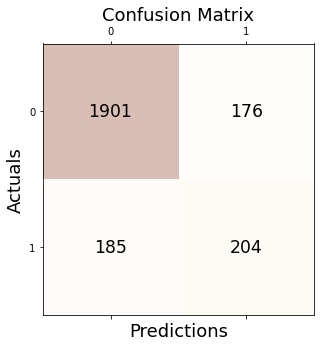

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
# predict_proba predicts the probability and predict just predicts the category
# y_pred = dt.predict_proba(X_test)[:, 1]
y_pred = dt.predict(X_test)

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.91      0.92      0.91      2077
        True       0.54      0.52      0.53       389

    accuracy                           0.85      2466
   macro avg       0.72      0.72      0.72      2466
weighted avg       0.85      0.85      0.85      2466



In [ ]:
# Take a peek at your predictions:
# Take a look at the first 10 rows and compare the predictions.
pred_y = dt.predict(X_test)
print("The first 10 prediction {}".format(pred_y[:10].round(0)))
print("The real first 10 labels {}".format(y_test[:10]))

The first 10 prediction [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
The real first 10 labels [False False False False False False False False False  True]


In [ ]:
# How to make predictions with BRAND NEW VALUES
type(df_train_full.head(1))

pandas.core.frame.DataFrame

In [ ]:
# Use double brackets around the iloc to force it to return a pandas dataframe and not a series
# Then you can convert ANY record into a dictionary.
# This is important because when you want to make a prediction - it must be in this format
df_train_full.iloc[[21]]

,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,month,operatingsystems,browser,region,traffictype,visitortype,weekend
10683,9,227.375,4,102.25,48,2849.482143,0.0,0.014854,4.741626,0.0,nov,2,2,4,2,returning_visitor,False


In [ ]:
# How to convert any pandas row into a dictionary... needed for predictions
df_train_full.iloc[[213]].to_dict('records')[0]

{'administrative': 7,
 'administrative_duration': 103.6,
 'informational': 0,
 'informational_duration': 0.0,
 'productrelated': 72,
 'productrelated_duration': 1933.559259,
 'bouncerates': 0.005333333,
 'exitrates': 0.026377261,
 'pagevalues': 7.806338478,
 'specialday': 0.0,
 'month': 'sep',
 'operatingsystems': 2,
 'browser': 2,
 'region': 6,
 'traffictype': 2,
 'visitortype': 'returning_visitor',
 'weekend': False}

In [ ]:
# How to convert any pandas row into a dictionary... needed for predictions
df_train_full.head(21).to_dict('records')[0]

{'administrative': 0,
 'administrative_duration': 0.0,
 'informational': 0,
 'informational_duration': 0.0,
 'productrelated': 30,
 'productrelated_duration': 849.75,
 'bouncerates': 0.077419355,
 'exitrates': 0.112903226,
 'pagevalues': 0.0,
 'specialday': 0.8,
 'month': 'may',
 'operatingsystems': 2,
 'browser': 2,
 'region': 3,
 'traffictype': 20,
 'visitortype': 'returning_visitor',
 'weekend': False}

In [ ]:
#item = df_train.head(1).to_dict('records')[0]
item = df_train_full.iloc[[213]].to_dict('records')[0]
actual = y_train[[213]]

In [ ]:
item


{'administrative': 7,
 'administrative_duration': 103.6,
 'informational': 0,
 'informational_duration': 0.0,
 'productrelated': 72,
 'productrelated_duration': 1933.559259,
 'bouncerates': 0.005333333,
 'exitrates': 0.026377261,
 'pagevalues': 7.806338478,
 'specialday': 0.0,
 'month': 'sep',
 'operatingsystems': 2,
 'browser': 2,
 'region': 6,
 'traffictype': 2,
 'visitortype': 'returning_visitor',
 'weekend': False}

In [ ]:
# The item to be predicted is passed in.  
def model_prediction(item, dv, model):
    X = dv.transform([item])
    y_pred = model.predict(X)
    return y_pred[0]

In [ ]:
# The item to be predicted is passed in. Probability Model 
def model_prediction_proba(item, dv, model):
    X = dv.transform([item])
    y_pred = model.predict_proba(X)[:, 1]
    return y_pred[0]

In [ ]:
model_prediction(item,dv,dt)

False

In [ ]:
actual

array([False])

In [ ]:
model_prediction_proba(item,dv,dt)

0.0

In [ ]:
# How to convert any pandas row into a dictionary... needed for predictions
# This will give you a template that you can manipulate to create predictions with new values
df_train_full.iloc[[2]].to_dict('records')[0]

{'administrative': 9,
 'administrative_duration': 444.2847222,
 'informational': 0,
 'informational_duration': 0.0,
 'productrelated': 534,
 'productrelated_duration': 18504.12621,
 'bouncerates': 0.010856514,
 'exitrates': 0.023309001,
 'pagevalues': 2.54795624,
 'specialday': 0.0,
 'month': 'nov',
 'operatingsystems': 2,
 'browser': 2,
 'region': 3,
 'traffictype': 2,
 'visitortype': 'returning_visitor',
 'weekend': True}

In [ ]:
# The list above can be copied into here.  Take everything after a " : " and put it in a [] so you can pass it in as a pd.DF
# create a DataFrame by transforming scalar values to list   (toggle the weekend)

myItem = {'administrative': 9,
 'administrative_duration': 444.2847222,
 'informational': 0,
 'informational_duration': 0.0,
 'productrelated': 534,
 'productrelated_duration': 18504.12621,
 'bouncerates': 0.010856514,
 'exitrates': 0.023309001,
 'pagevalues': 2.54795624,
 'specialday': 0.0,
 'month': 'nov',
 'operatingsystems': 2,
 'browser': 2,
 'region': 3,
 'traffictype': 2,
 'visitortype': 'returning_visitor',
 'weekend': True}



In [ ]:
newDF = pd.DataFrame.from_dict(myItem)

In [ ]:
newDF.head()

In [ ]:
item = newDF.to_dict('records')[0]

In [ ]:
model_prediction(item,dv,dt)

In [ ]:
# Hyperparameter Tuning... light...
# Look at the model parameters.   You can tune these.
dt.get_params()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = {'min_samples_leaf': [1, 3],'max_depth': [4,6,8],'min_samples_split': [2,4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

In [ ]:
grid_search_cv.best_estimator_    # this will output the best values for the hyperparameters


In [ ]:
# Let's assume that the decision tree is the one we want to explore
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=3, random_state=42)
dt.fit(X_train, y_train)

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz( 
 grid_search_cv.best_estimator_,
 out_file=('tree.dot'),
 feature_names=dv.feature_names_,
 class_names=None,
 filled=True,
)

In [ ]:
!pip install pydot
import pydot

(graph,) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')